In [1]:
!pip install mxnet-cu101mkl gluoncv d2l

In [2]:
from d2l import mxnet as d2l
from mxnet import np, npx
from mxnet.gluon import nn
npx.set_np()
def vgg_block(num_convs, num_channels):
  blk = nn.Sequential()
  for _ in range(num_convs):
    blk.add(nn.Conv2D(num_channels, kernel_size=3,
                      padding=1, activation='relu'))
  blk.add(nn.MaxPool2D(pool_size=2, strides=2))
  return blk

In [3]:
conv_arch = ((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))

In [4]:
def vgg(conv_arch):
  net = nn.Sequential()
  # The convolutional part
  for (num_convs, num_channels) in conv_arch:
    net.add(vgg_block(num_convs, num_channels))
  # The fully-connected part
  net.add(nn.Dense(4096, activation='relu'), nn.Dropout(0.5),
          nn.Dense(4096, activation='relu'), nn.Dropout(0.5),
          nn.Dense(10))
  return net
net = vgg(conv_arch)

In [5]:
net.initialize()
X = np.random.uniform(size=(1, 1, 224, 224))
for blk in net:
  X = blk(X)
  print(blk.name, 'output shape:\t', X.shape)

sequential1 output shape:	 (1, 64, 112, 112)
sequential2 output shape:	 (1, 128, 56, 56)
sequential3 output shape:	 (1, 256, 28, 28)
sequential4 output shape:	 (1, 512, 14, 14)
sequential5 output shape:	 (1, 512, 7, 7)
dense0 output shape:	 (1, 4096)
dropout0 output shape:	 (1, 4096)
dense1 output shape:	 (1, 4096)
dropout1 output shape:	 (1, 4096)
dense2 output shape:	 (1, 10)


In [6]:
ratio = 4
small_conv_arch = [(pair[0], pair[1] // ratio) for pair in conv_arch]
net = vgg(small_conv_arch)

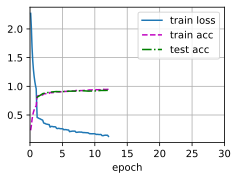

In [ ]:
lr, num_epochs, batch_size = 0.05, 30, 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr)